# DML Dataset - 1(Vehicle Insurance Claim Fraud Detection)

### Import of  Libraries

In [1]:
  import pandas as pd 
  import numpy as np
  import matplotlib.pyplot as plt 
  import seaborn as sns
  from sklearn.preprocessing import OrdinalEncoder
  from sklearn.model_selection import train_test_split, cross_val_score
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score


### Some Important Function 

In [2]:
def drop_columns(dataframe, columns_to_drop):
    """
    Drops specified columns from a pandas DataFrame inplace.
    Returns:
    None
    """
    dataframe.drop(columns=columns_to_drop, inplace=True)    

In [3]:
def missing_values(Dataframe):
    '''To Check the missing Values in Data  Frame'''
    Feature=[]
    missing_values=[]
    Percentage_of_Missing_Values=[]
    Matrix=pd.DataFrame()
    for i in df.columns:
        a=df[i].isnull().sum()
        if a > 0:
            b=a/len(df)*100
            missing_values.append(a)
            Feature.append(i)
            Percentage_of_Missing_Values.append(b)
    Matrix["Feature"]=Feature
    Matrix["Missing Values"]=missing_values
    Matrix["Percentage of Missing Values"]=Percentage_of_Missing_Values
    Matrix=Matrix.sort_values(by="Percentage of Missing Values", ascending=False)
    return Matrix 


In [4]:
def cat_feature(dataframe):
    '''To Check The Category column in Data frame'''
    cat=[]
    for col in dataframe.columns:
        if df[col].dtype == 'object':
            cat.append(col)
    return cat 

In [5]:
def numerical_feature(dataframe):
    num=[]
    for col in dataframe.columns:
        if dataframe[col].dtype in ['float64', 'int64']:
            num.append(col)
    return num

In [6]:
def unique_feature_values(Dataframe, columns):
    unique_values = []
    for feature in columns:
        unique_values.append((feature,Dataframe[feature].unique()))
    return unique_values

#### Adopting the KDD Methodologies
Step 1: Data Collection

Step 2: Pre-processing and Exploring the data

Step 3: Data Preparation

Step 4: Model Training

Step 5: Evaluating Model Performance

Step 6: Improving Model Performance

### Step 1: Data Collection

In [7]:
df=pd.read_csv(r"C:\Users\Aniket\Desktop\DML_project\Dataset_1.csv")

In [8]:
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [9]:
df.shape

(15420, 33)

In [10]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
RepNumber,15420.0,8.483268,4.599948,1.0,5.00,8.0,12.00,16.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


### Step 2: Pre-processing and Exploring the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

### Fraud found is the target variable 
0 indicates : no fraud found 
1 indicates : fraud found 

In [13]:
df['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

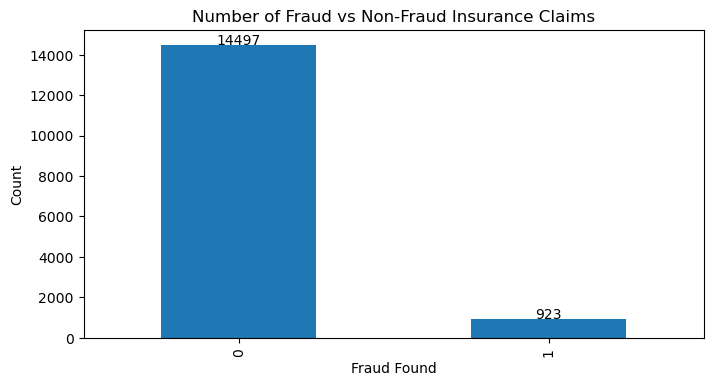

In [14]:
# Count the number of fraud cases
fraud_counts = df['FraudFound_P'].value_counts()

# Create a bar plot using matplotlib
fig, ax = plt.subplots(figsize=(8, 4))
fraud_counts.plot(kind='bar', ax=ax)
# Add value labels to the bars
for i, v in enumerate(fraud_counts):
    ax.text(i, v + 10, str(v), color='black', ha='center')

# Set the plot title and axis labels
ax.set_title('Number of Fraud vs Non-Fraud Insurance Claims')
ax.set_xlabel('Fraud Found')
ax.set_ylabel('Count')

plt.show()


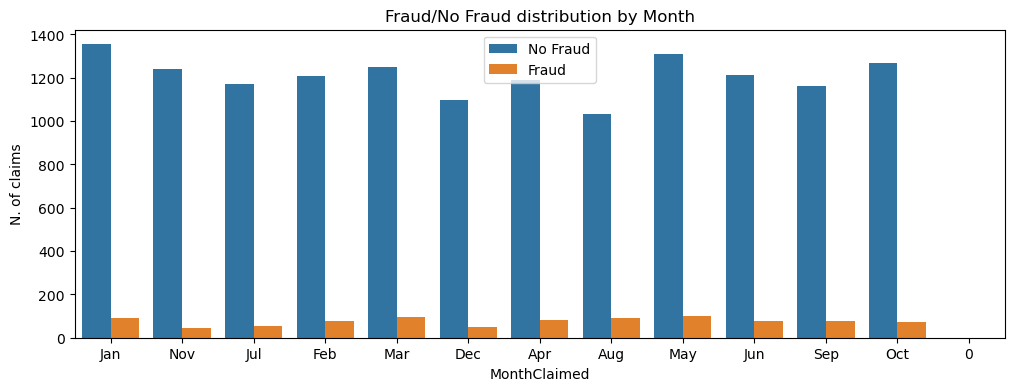

In [15]:
plt.figure(figsize=(12, 4))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="MonthClaimed", hue ='FraudFound_P', data=df)

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Month')

plt.ylabel('N. of claims')
plt.show()

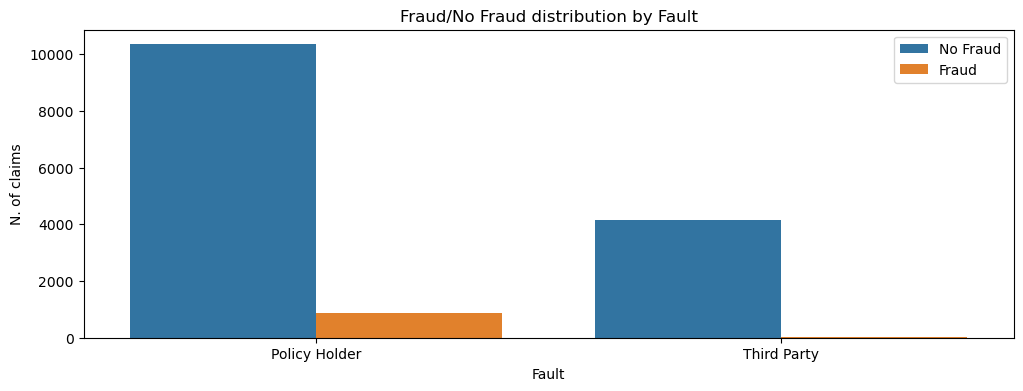

In [16]:
plt.figure(figsize=(12, 4))
labels = ['No Fraud', 'Fraud']
sns.countplot(x="Fault", hue ='FraudFound_P', data=df)

plt.legend(labels)
plt.title('Fraud/No Fraud distribution by Fault')

plt.ylabel('N. of claims')
plt.show()

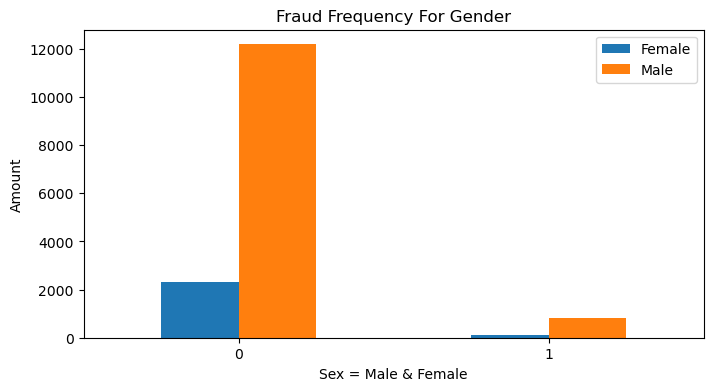

In [17]:
# plot based on gender and Men are most likely to c
pd.crosstab(df.FraudFound_P, df.Sex).plot(kind="bar",figsize=(8,4))
plt.title("Fraud Frequency For Gender")
plt.xlabel("Sex = Male & Female")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation = 0);

### From above plot it is clear men are more likely to do fraud 

Text(0, 0.5, 'Amount')

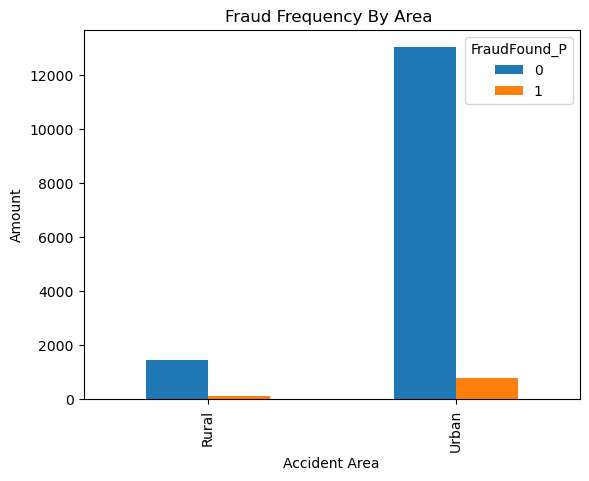

In [18]:
pd.crosstab(df.AccidentArea,df.FraudFound_P).plot(kind='bar')
plt.title("Fraud Frequency By Area ")
plt.xlabel("Accident Area")
plt.ylabel("Amount")

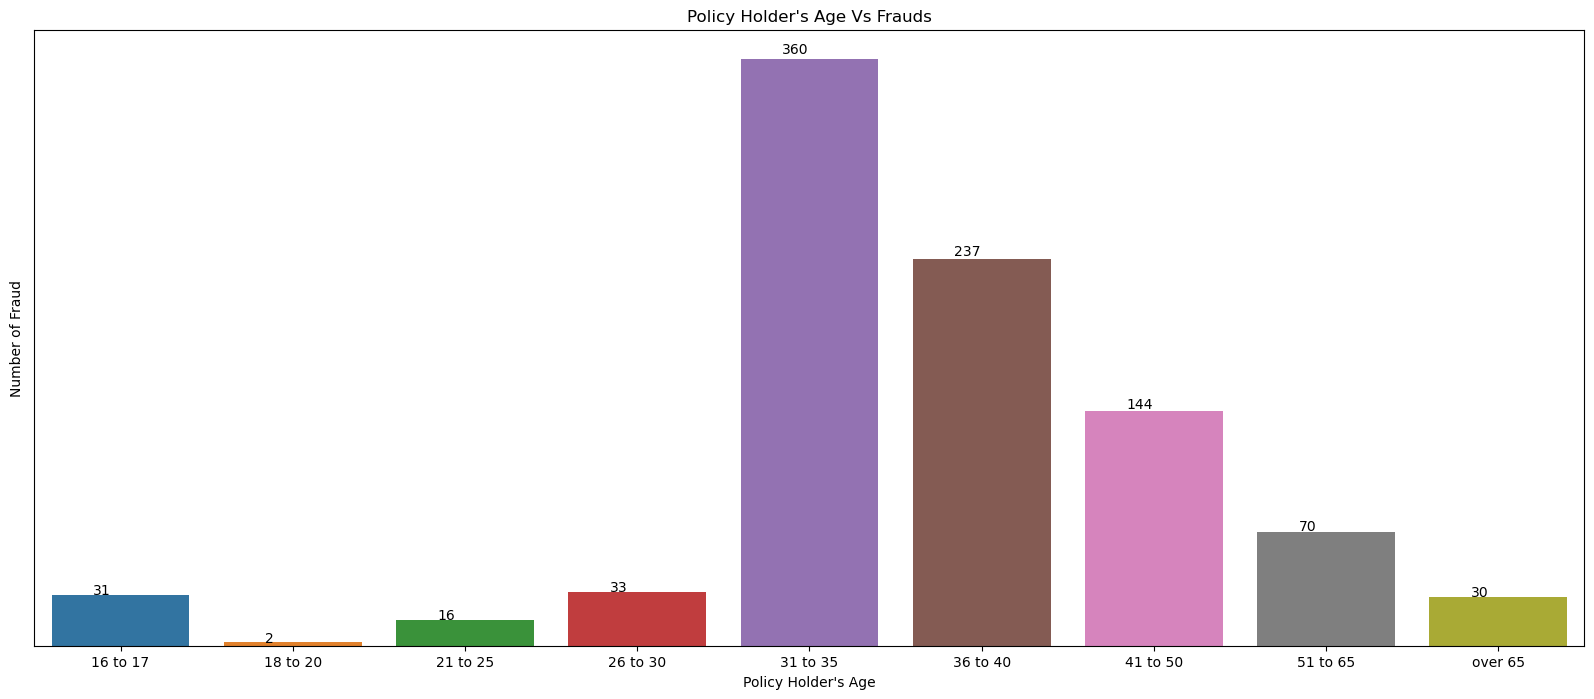

In [19]:
policyAge = df.groupby('AgeOfPolicyHolder')['FraudFound_P'].sum()
plt.figure(figsize=(20,8))
plt.title("Policy Holder's Age Vs Frauds")

ax = sns.barplot(x=policyAge.index,y=policyAge.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Policy Holder's Age")
plt.ylabel("Number of Fraud");
plt.yticks([])
plt.show()

### From Age between 31 to 40 are most likly to do fraud 

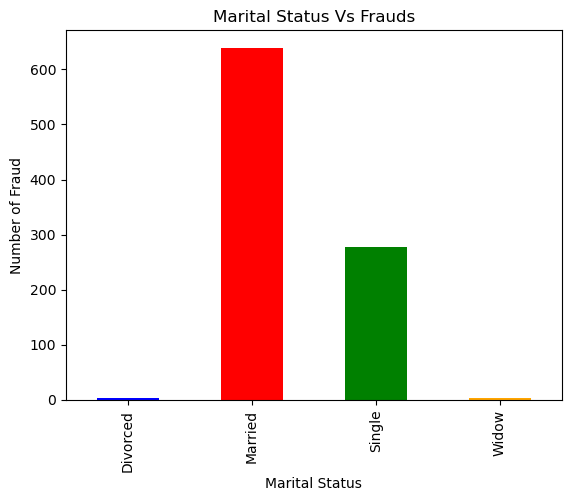

In [20]:
df_fraud_based_ma=df.groupby('MaritalStatus')['FraudFound_P'].sum()
plt.title("Marital Status Vs Frauds")
df_fraud_based_ma.plot(kind='bar',color=['blue', 'red', 'green', 'orange'])
plt.xlabel("Marital Status")
plt.ylabel("Number of Fraud");

## Step 3: Data Preparation

In [21]:
#No null values in data set
missing_values(df)

,Feature,Missing Values,Percentage of Missing Values


In [22]:
# Plolicy number is not important so droping that 
drop_columns(df,'PolicyNumber')

In [23]:
#checking the unique values for all column 
unique_feature_values(df,df.columns)

[('Month',
  array(['Dec', 'Jan', 'Oct', 'Jun', 'Feb', 'Nov', 'Apr', 'Mar', 'Aug',
         'Jul', 'May', 'Sep'], dtype=object)),
 ('WeekOfMonth', array([5, 3, 2, 4, 1], dtype=int64)),
 ('DayOfWeek',
  array(['Wednesday', 'Friday', 'Saturday', 'Monday', 'Tuesday', 'Sunday',
         'Thursday'], dtype=object)),
 ('Make',
  array(['Honda', 'Toyota', 'Ford', 'Mazda', 'Chevrolet', 'Pontiac',
         'Accura', 'Dodge', 'Mercury', 'Jaguar', 'Nisson', 'VW', 'Saab',
         'Saturn', 'Porche', 'BMW', 'Mecedes', 'Ferrari', 'Lexus'],
        dtype=object)),
 ('AccidentArea', array(['Urban', 'Rural'], dtype=object)),
 ('DayOfWeekClaimed',
  array(['Tuesday', 'Monday', 'Thursday', 'Friday', 'Wednesday', 'Saturday',
         'Sunday', '0'], dtype=object)),
 ('MonthClaimed',
  array(['Jan', 'Nov', 'Jul', 'Feb', 'Mar', 'Dec', 'Apr', 'Aug', 'May',
         'Jun', 'Sep', 'Oct', '0'], dtype=object)),
 ('WeekOfMonthClaimed', array([1, 4, 2, 3, 5], dtype=int64)),
 ('Sex', array(['Female', 'Male'], dtyp

### though data set has no null values 
but in ages, mounth and day of week has zero as the unique value so further investigation 

In [24]:
df[df['DayOfWeekClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [25]:
# Check MonthClaimed == 0
df[df['MonthClaimed']=='0']

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
1516,Jul,2,Monday,Honda,Rural,0,0,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [26]:
# Both of the row values are same so droping the row 
# Drop DayOfWeekClaimed & MonthClaimed == 0, since the 0 in the same row and only one row, so we can drop it
df = df[~(df['MonthClaimed']=='0')]


In [27]:
print(df[df['Age']==0].shape)
df[df['Age']==0].head(3)

(319, 32)


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,...,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils


In [28]:
# Now Let's Fill 0 value with median of the column
df["Age"] = df["Age"].replace(0,df["Age"].median())

In [29]:
print(df[df['Age']==0].shape)

(0, 32)


### Now there is no zeros values in data frame

In [30]:
# checking co-relation
df.corr()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,RepNumber,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275366,-0.011356,-0.011872,0.005340,-0.004000,-0.016834,-0.003949
WeekOfMonthClaimed,0.275366,1.000000,0.001065,-0.005783,0.009033,0.005442,-0.000086,0.012082
Age,-0.011356,0.001065,1.000000,-0.022832,-0.005410,0.065049,0.000738,0.017240
FraudFound_P,-0.011872,-0.005783,-0.022832,1.000000,-0.007529,0.017345,0.007259,-0.024778
RepNumber,0.005340,0.009033,-0.005410,-0.007529,1.000000,0.000525,0.011072,0.009438
Deductible,-0.004000,0.005442,0.065049,0.017345,0.000525,1.000000,0.003882,-0.001182
DriverRating,-0.016834,-0.000086,0.000738,0.007259,0.011072,0.003882,1.000000,-0.013922
Year,-0.003949,0.012082,0.017240,-0.024778,0.009438,-0.001182,-0.013922,1.000000


<AxesSubplot:>

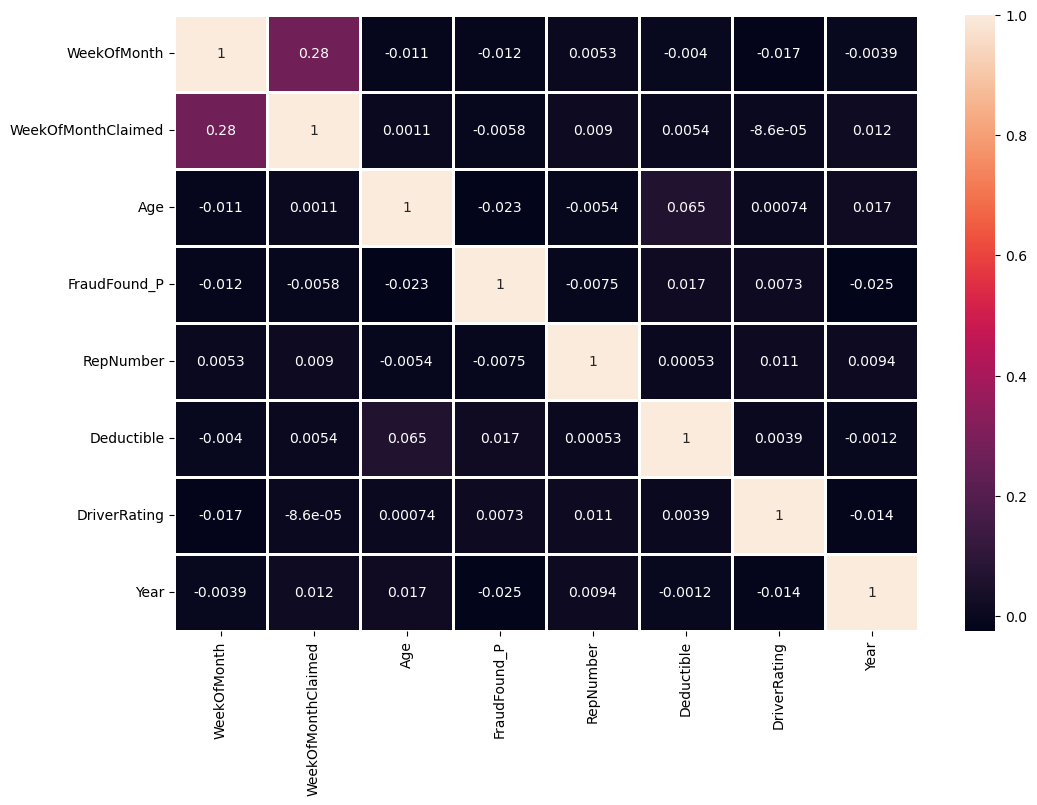

In [31]:
plt.figure(figsize=(12,8))
sns.heatmap(data=df.corr(),annot=True,linewidths=2)

It is clear from the heatmap we do not have the data which is highly co-related 

In [32]:
ununique=df.nunique().to_frame()
ununique.columns=['Count']
ununique.index.names=['ColName']
ununique=ununique.reset_index()


<Figure size 1600x800 with 0 Axes>

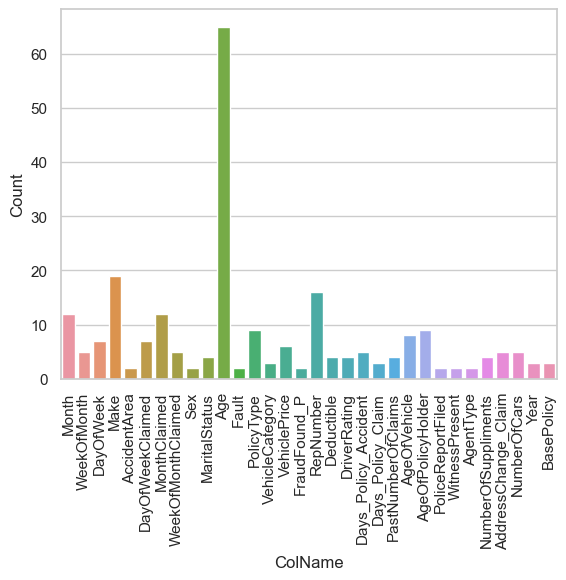

<Figure size 1600x800 with 0 Axes>

In [33]:
sns.set(style='whitegrid',color_codes=True)
sns.barplot(x='ColName',y="Count",data=ununique)
plt.xticks(rotation=90)
plt.figure(figsize=(16,8))

## Check for outliers 

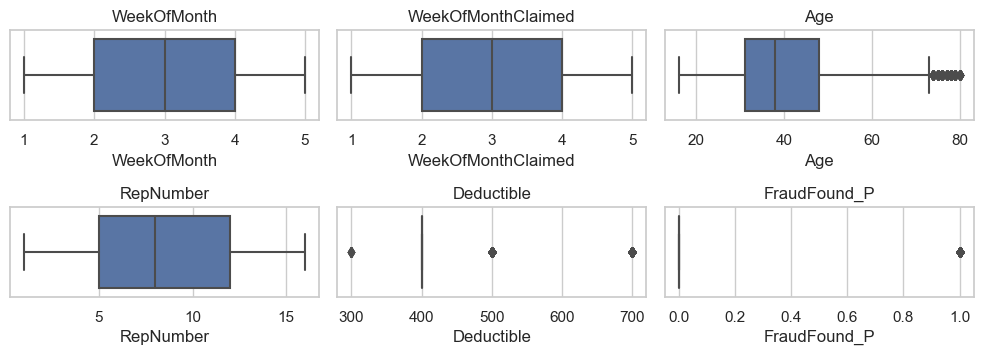

In [34]:

features = ['WeekOfMonth','WeekOfMonthClaimed','Age','RepNumber','Deductible','FraudFound_P']
plt.figure(figsize=(10,5))

for i, feature in enumerate(features):
    ax = plt.subplot(3,3, i+1)
    sns.boxplot(x=df[feature], ax=ax)
    plt.title(feature)

plt.tight_layout()
plt.show()


In [35]:
df[df['Deductible']> 500]

ColName,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
93,Aug,4,Saturday,Pontiac,Urban,Monday,Aug,5,Male,Married,...,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,1994,Collision
217,Jan,5,Tuesday,Mazda,Urban,Tuesday,Jan,5,Male,Married,...,more than 7,over 65,No,No,External,1 to 2,no change,1 vehicle,1994,Liability
248,Feb,3,Friday,Toyota,Urban,Monday,Feb,3,Male,Single,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
341,Sep,4,Sunday,Toyota,Urban,Tuesday,Oct,2,Male,Married,...,7 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
372,Sep,2,Tuesday,Chevrolet,Rural,Wednesday,Sep,3,Male,Married,...,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15283,Oct,2,Wednesday,Chevrolet,Urban,Friday,Oct,3,Male,Married,...,more than 7,36 to 40,No,No,External,none,no change,1 vehicle,1996,All Perils
15314,Jan,5,Saturday,Pontiac,Urban,Monday,Jan,5,Female,Single,...,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1996,Liability
15345,Nov,2,Tuesday,Chevrolet,Urban,Friday,Nov,3,Male,Married,...,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,1996,Collision
15376,Jan,3,Friday,Ford,Urban,Thursday,Jan,3,Male,Married,...,7 years,41 to 50,No,No,External,1 to 2,no change,1 vehicle,1996,Collision


In [36]:
df[df['Age']> 80]

ColName,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy


In [37]:
df['Deductible'] = pd.to_numeric(df['Deductible'], errors='coerce')
df = df[~(df['Deductible'] > 500)]
df = df[~(df['Age'] > 80)]


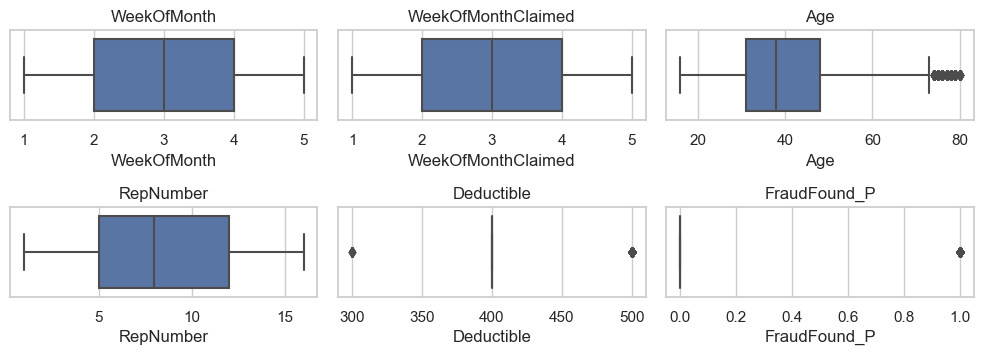

In [38]:
features = ['WeekOfMonth','WeekOfMonthClaimed','Age','RepNumber','Deductible','FraudFound_P']
plt.figure(figsize=(10,5))

for i, feature in enumerate(features):
    ax = plt.subplot(3,3, i+1)
    sns.boxplot(x=df[feature], ax=ax)
    plt.title(feature)

plt.tight_layout()
plt.show()


#### we removed 311 rows from data set and now we can see the effect on box plot 

### Encoding 

In [39]:
# calling function to get details for categorical feature 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

cols = df.select_dtypes('O').columns

df[cols]= df[cols].apply(le.fit_transform)


In [40]:
df

ColName,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,5,4,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,1,4,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,4,9,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,0,5,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,5,3,2,0,2,...,3,4,0,0,0,3,3,0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,5,9,5,1,1,...,4,4,0,0,0,3,3,0,1996,1
15416,9,5,4,13,1,0,2,1,1,1,...,4,4,0,0,0,2,3,2,1996,2
15417,9,5,4,17,0,0,2,1,1,2,...,3,3,0,0,0,0,3,0,1996,1
15418,2,1,1,17,1,4,2,2,0,1,...,0,4,0,0,0,2,3,0,1996,0


In [41]:
drop_columns(df,'Year')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15108 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15108 non-null  int32
 1   WeekOfMonth           15108 non-null  int64
 2   DayOfWeek             15108 non-null  int32
 3   Make                  15108 non-null  int32
 4   AccidentArea          15108 non-null  int32
 5   DayOfWeekClaimed      15108 non-null  int32
 6   MonthClaimed          15108 non-null  int32
 7   WeekOfMonthClaimed    15108 non-null  int64
 8   Sex                   15108 non-null  int32
 9   MaritalStatus         15108 non-null  int32
 10  Age                   15108 non-null  int64
 11  Fault                 15108 non-null  int32
 12  PolicyType            15108 non-null  int32
 13  VehicleCategory       15108 non-null  int32
 14  VehiclePrice          15108 non-null  int32
 15  FraudFound_P          15108 non-null  int64
 16  RepN

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15108 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15108 non-null  int32
 1   WeekOfMonth           15108 non-null  int64
 2   DayOfWeek             15108 non-null  int32
 3   Make                  15108 non-null  int32
 4   AccidentArea          15108 non-null  int32
 5   DayOfWeekClaimed      15108 non-null  int32
 6   MonthClaimed          15108 non-null  int32
 7   WeekOfMonthClaimed    15108 non-null  int64
 8   Sex                   15108 non-null  int32
 9   MaritalStatus         15108 non-null  int32
 10  Age                   15108 non-null  int64
 11  Fault                 15108 non-null  int32
 12  PolicyType            15108 non-null  int32
 13  VehicleCategory       15108 non-null  int32
 14  VehiclePrice          15108 non-null  int32
 15  FraudFound_P          15108 non-null  int64
 16  RepN

#### Now all data has been Encoded 

<AxesSubplot:ylabel='ColName'>

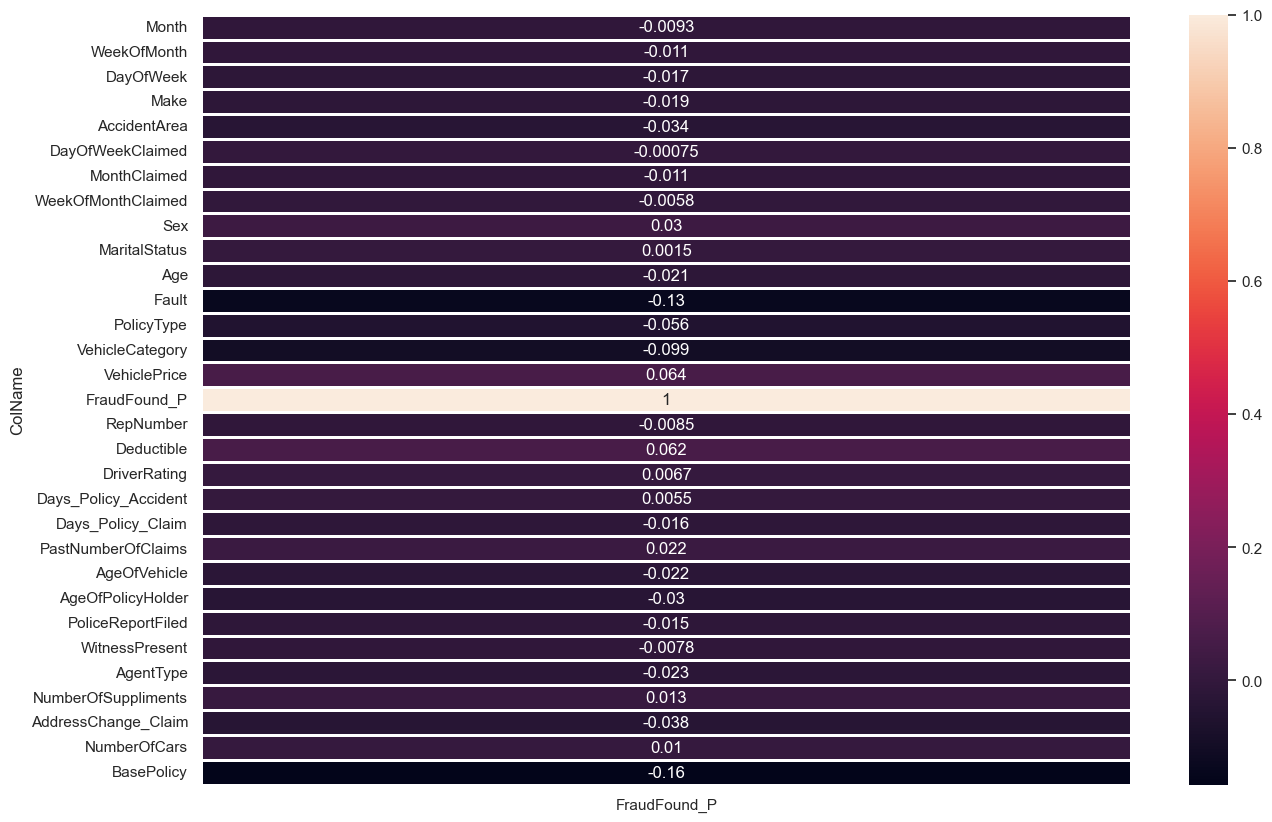

In [44]:
df.corr()['FraudFound_P'].to_frame()
plt.figure(figsize=(15,10))
sns.heatmap(df.corr()['FraudFound_P'].to_frame(), annot=True, linewidths=2)


### We can observe that some columns have low correlation with the "FraudFound_P" column, indicating that they are not strongly related to the occurrence of fraud.
1. Witness present
2. Days_Policy_Accident
3.MaritalStatus
4.RepNumber 
5.   DayOfWeekClaimed 
6.  MonthClaimed        
7.WeekOfMonthClaimed 
8.DriverRating
'Month,'WeekOfMonth','DayOfWeek' :- these column are not 

In [45]:
coolumn_tobe_drop=['Month','WeekOfMonth','DayOfWeek','Days_Policy_Accident','MaritalStatus','RepNumber','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','DriverRating']

In [46]:
drop_columns(df,coolumn_tobe_drop)

In [47]:
df.columns

Index(['Make', 'AccidentArea', 'Sex', 'Age', 'Fault', 'PolicyType',
       'VehicleCategory', 'VehiclePrice', 'FraudFound_P', 'Deductible',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars',
       'BasePolicy'],
      dtype='object', name='ColName')

<AxesSubplot:xlabel='ColName', ylabel='ColName'>

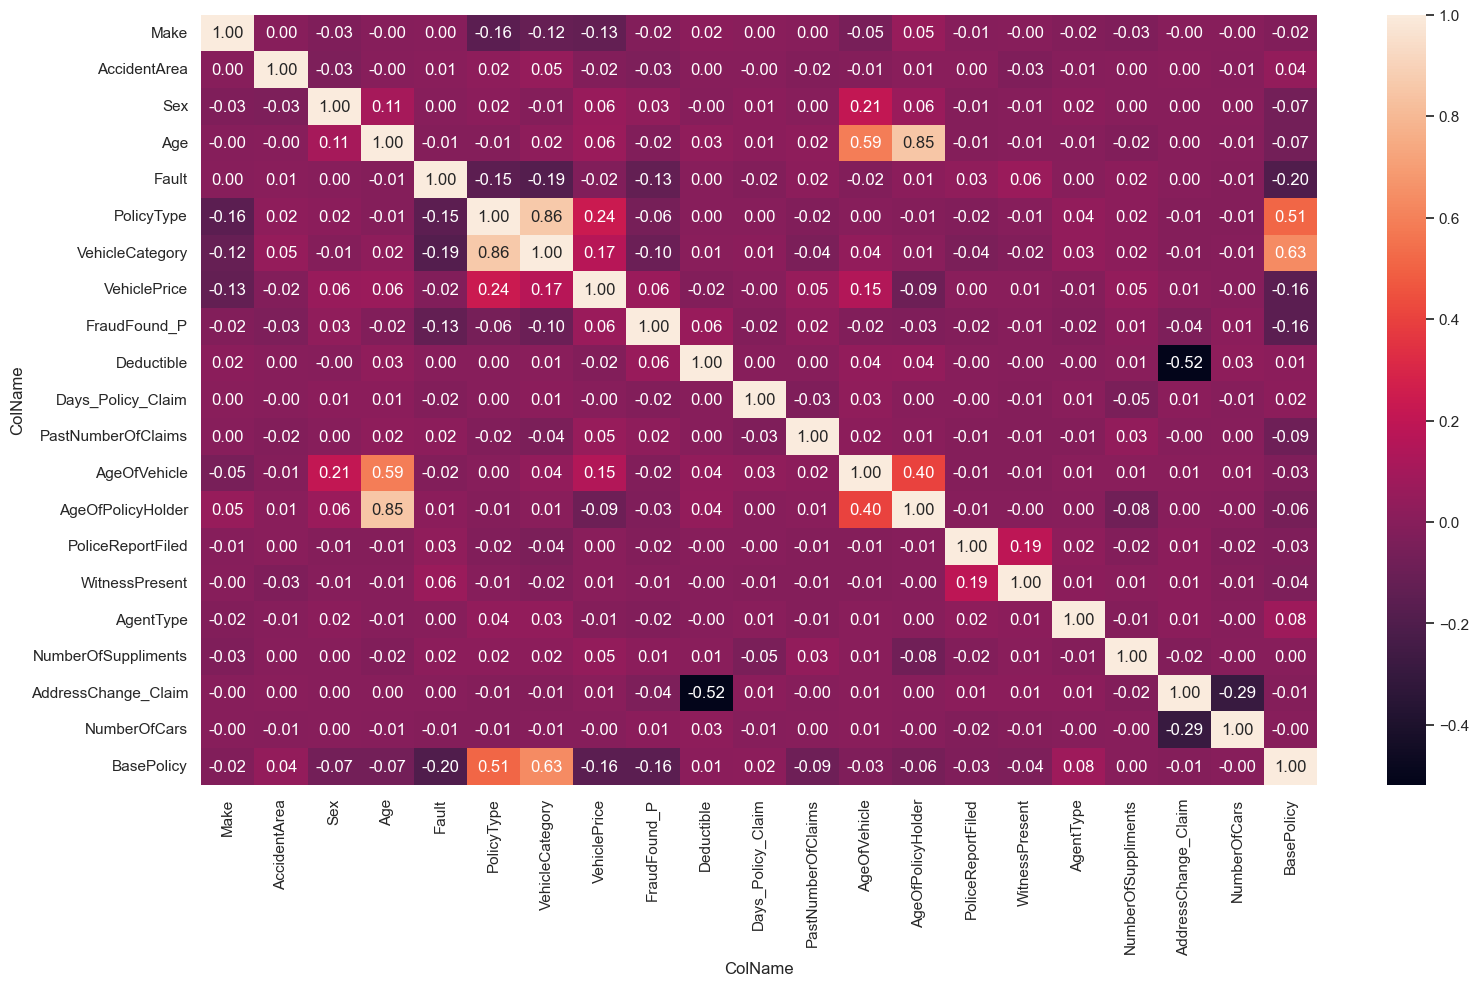

In [48]:
df.corr()
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True,fmt='.2f')

### Few Columns are highly co-relation 
 'Age',Deductible'

In [49]:
columns_to_be_droped =['Age','Deductible']
drop_columns(df,columns_to_be_droped)

In [50]:
unique_feature_values(df,df.columns)

[('Make',
  array([ 6, 17,  5,  9,  2, 13,  0,  3, 11,  7, 12, 18, 15, 16, 14,  1, 10,
          4,  8])),
 ('AccidentArea', array([1, 0])),
 ('Sex', array([0, 1])),
 ('Fault', array([0, 1])),
 ('PolicyType', array([5, 4, 2, 6, 0, 1, 7, 8, 3])),
 ('VehicleCategory', array([1, 2, 0])),
 ('VehiclePrice', array([5, 0, 1, 4, 2, 3])),
 ('FraudFound_P', array([0, 1], dtype=int64)),
 ('Days_Policy_Claim', array([2, 0, 1])),
 ('PastNumberOfClaims', array([3, 0, 1, 2])),
 ('AgeOfVehicle', array([1, 4, 5, 6, 3, 7, 2, 0])),
 ('AgeOfPolicyHolder', array([3, 4, 6, 7, 2, 5, 0, 8, 1])),
 ('PoliceReportFiled', array([0, 1])),
 ('WitnessPresent', array([0, 1])),
 ('AgentType', array([0, 1])),
 ('NumberOfSuppliments', array([3, 2, 1, 0])),
 ('AddressChange_Claim', array([0, 3, 2, 1, 4])),
 ('NumberOfCars', array([2, 0, 1, 3, 4])),
 ('BasePolicy', array([2, 1, 0]))]

In [51]:
df.astype('int')

ColName,Make,AccidentArea,Sex,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
0,6,1,0,0,5,1,5,0,2,3,1,3,0,0,0,3,0,2,2
1,6,1,1,0,4,1,5,0,2,3,4,4,1,0,0,3,3,0,1
2,6,1,1,0,4,1,5,0,2,0,5,6,0,0,0,3,3,0,1
3,17,0,1,1,2,1,0,0,2,0,6,7,1,0,0,2,3,0,2
4,6,1,0,1,4,1,5,0,2,3,3,4,0,0,0,3,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,17,1,1,0,1,0,0,1,2,1,4,4,0,0,0,3,3,0,1
15416,13,1,1,0,2,1,1,0,2,2,4,4,0,0,0,2,3,2,2
15417,17,0,1,0,1,0,0,1,2,2,3,3,0,0,0,0,3,0,1
15418,17,1,0,1,0,0,0,0,2,3,0,4,0,0,0,2,3,0,0


In [52]:
Model_df=df.copy()

In [53]:
Model_df.dtypes

ColName
Make                   int32
AccidentArea           int32
Sex                    int32
Fault                  int32
PolicyType             int32
VehicleCategory        int32
VehiclePrice           int32
FraudFound_P           int64
Days_Policy_Claim      int32
PastNumberOfClaims     int32
AgeOfVehicle           int32
AgeOfPolicyHolder      int32
PoliceReportFiled      int32
WitnessPresent         int32
AgentType              int32
NumberOfSuppliments    int32
AddressChange_Claim    int32
NumberOfCars           int32
BasePolicy             int32
dtype: object

Step 4: Model Training

Step 5: Evaluating Model Performance

Step 6: Improving Model Performance

## Test and train data split

In [54]:
from sklearn.model_selection import train_test_split

X = Model_df.drop('FraudFound_P',axis=1)
Y = Model_df[['FraudFound_P']]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y,test_size = 0.2,  random_state=0 )
X_Train.shape, X_Test.shape, Y_Train.shape, Y_Test.shape

((12086, 18), (3022, 18), (12086, 1), (3022, 1))

# The dataset is extremely imbalanced and will not give accurate information. This can be overcome by one of the two ways :
1. Upscale the  Fraud Found    (FraudFound ==1) in this case
2. Downsample the Non Fraud cases  (FraudFound ==0) in this case

In [55]:
Model_df[['FraudFound_P']].value_counts()

FraudFound_P
0               14203
1                 905
dtype: int64

In [56]:
from sklearn.utils import resample

n = Model_df.FraudFound_P.value_counts()[0]

df_majority = Model_df[Model_df.FraudFound_P==0]
df_minority = Model_df[Model_df.FraudFound_P==1]

df_minority_upsampled = resample(df_minority,replace=True,n_samples = n,random_state=42)

df_upsampled = pd.concat([df_majority,df_minority_upsampled])
df_upsampled.FraudFound_P.value_counts()

0    14203
1    14203
Name: FraudFound_P, dtype: int64

In [57]:
df_upsampled.shape

(28406, 19)

In [58]:
X_1= df_upsampled.drop('FraudFound_P',axis=1)
Y_1= df_upsampled[['FraudFound_P']]
X_Train_1, X_Test_1, Y_Train_1, Y_Test_1 = train_test_split(X_1,Y_1,test_size = 0.2,  random_state=42)
X_Train_1.shape, X_Test_1.shape, Y_Train_1.shape, Y_Test_1.shape

((22724, 18), (5682, 18), (22724, 1), (5682, 1))

# Model :-1  Linear Classification using sklearn library 

### b. On unbalanced data set  Model :-1

#### Without  any tuning 

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score,cohen_kappa_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt




lr = LogisticRegression(max_iter=1000)
lr.fit(X_Train, Y_Train)

y_pred = lr.predict(X_Test)

lr_train_acc = accuracy_score(Y_Train, lr.predict(X_Train))
lr_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")


Training accuracy of Logistic Regression is : 0.9395167962932318
Test accuracy of Logistic Regression is : 0.9424222369291859
Logistic Regression cohen_kappa_score : 0.0


C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


###  Performing tuning on Linear classification using grid search cv 

In [60]:

from sklearn.model_selection import train_test_split, GridSearchCV


# Define the logistic regression model
lr = LogisticRegression()

# Define the hyperparameters to tune and their possible values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_Train, Y_Train)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validated score: ", grid_search.best_score_)


Fitting 10 folds for each of 28 candidates, totalling 280 fits
Best hyperparameters:  {'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}
Best mean cross-validated score:  0.9395168137424067


C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:

# Train a new logistic regression model with the best hyperparameters
lr = LogisticRegression(**grid_search.best_params_)
lr.fit(X_Train, Y_Train)

# Make predictions on the testing set
y_pred = lr.predict(X_Test)

# Compute various performance metrics
lr_train_acc = accuracy_score(Y_Train, lr.predict(X_Train))
lr_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))



Training accuracy of Logistic Regression is : 0.9395167962932318
Test accuracy of Logistic Regression is : 0.9424222369291859
Logistic Regression cohen_kappa_score : 0.0
[[2848    0]
 [ 174    0]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2848
           1       0.00      0.00      0.00       174

    accuracy                           0.94      3022
   macro avg       0.47      0.50      0.49      3022
weighted avg       0.89      0.94      0.91      3022



C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricW

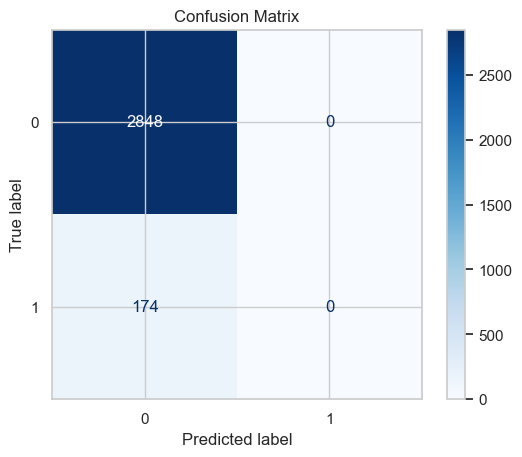

In [62]:
cm = confusion_matrix(Y_Test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()


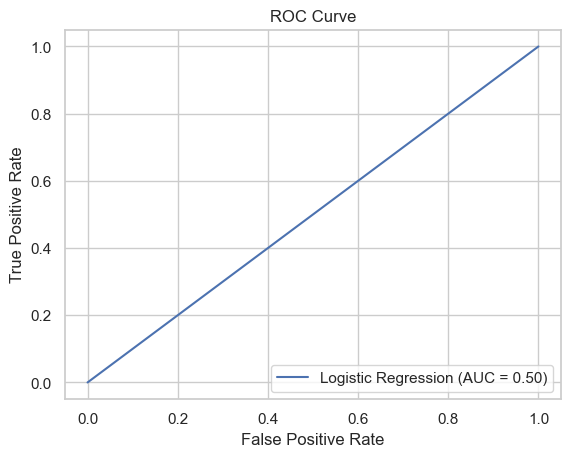

In [63]:
fpr, tpr, thresholds = roc_curve(Y_Test, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test, y_pred)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot()
plt.title("ROC Curve")
plt.show()


###  b.On balacnced data set Applying Linear classification 
X_Train_1.shape, X_Test_1.shape, Y_Train_1.shape, Y_Test_1.shape

 With out tuning 

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt



lr = LogisticRegression(max_iter=1000)
lr.fit(X_Train_1, Y_Train_1)

y_pred = lr.predict(X_Test_1)

lr_train_acc = accuracy_score(Y_Train_1, lr.predict(X_Train_1))
lr_test_acc = accuracy_score(Y_Test_1, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")


C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of Logistic Regression is : 0.7475796514698116
Test accuracy of Logistic Regression is : 0.7414642731432595
Logistic Regression cohen_kappa_score : 0.4839676079219708


####  with tuning applying Grid search cv 

Fitting 10 folds for each of 28 candidates, totalling 280 fits


C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best hyperparameters:  {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
Best mean cross-validated score:  0.7534320916701264


C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training accuracy of Logistic Regression is : 0.752904418236226
Test accuracy of Logistic Regression is : 0.7485040478704681
Logistic Regression cohen_kappa_score : 0.497938659013502
[[1695 1163]
 [ 266 2558]]
              precision    recall  f1-score   support

           0       0.86      0.59      0.70      2858
           1       0.69      0.91      0.78      2824

    accuracy                           0.75      5682
   macro avg       0.78      0.75      0.74      5682
weighted avg       0.78      0.75      0.74      5682



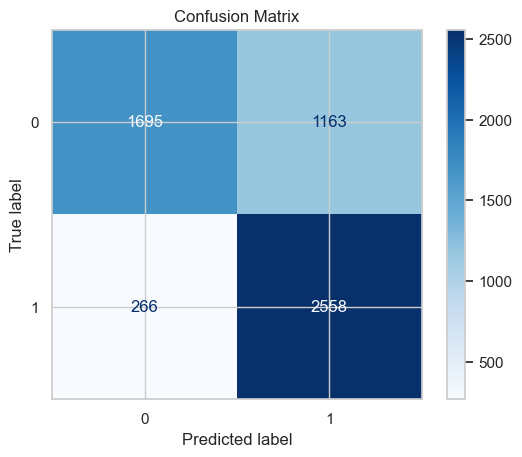

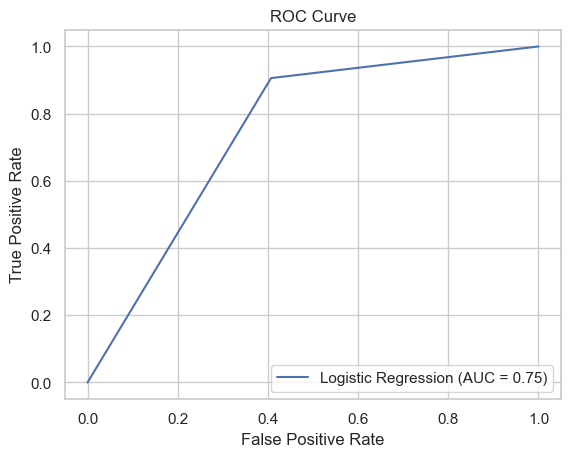

In [65]:

from sklearn.model_selection import train_test_split, GridSearchCV



# Define the logistic regression model
lr = LogisticRegression(max_iter=1000)

# Define the hyperparameters to tune and their possible values
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(lr, param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_Train_1, Y_Train_1)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best mean cross-validated score: ", grid_search.best_score_)



# Train a new logistic regression model with the best hyperparameters
lr = LogisticRegression(**grid_search.best_params_)
lr.fit(X_Train_1, Y_Train_1)

# Make predictions on the testing set
y_pred = lr.predict(X_Test_1)

# Compute various performance metrics
lr_train_acc = accuracy_score(Y_Train_1, lr.predict(X_Train_1))
lr_test_acc = accuracy_score(Y_Test_1, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred)

print(f"Training accuracy of Logistic Regression is : {lr_train_acc}")
print(f"Test accuracy of Logistic Regression is : {lr_test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")
print(confusion_matrix(Y_Test_1, y_pred))
print(classification_report(Y_Test_1, y_pred))

cm = confusion_matrix(Y_Test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test_1, y_pred)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot()
plt.title("ROC Curve")
plt.show()



# Model 2 :- Linear classification using Stats Module 

## On unbalced data set 

Optimization terminated successfully.
         Current function value: 0.191383
         Iterations 9
Training accuracy of Logistic Regression is : 0.9395167962932318
Test accuracy of Logistic Regression is : 0.9424222369291859
Logistic Regression cohen_kappa_score : 0.0
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2848
           1       0.00      0.00      0.00       174

    accuracy                           0.94      3022
   macro avg       0.47      0.50      0.49      3022
weighted avg       0.89      0.94      0.91      3022



C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Aniket\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


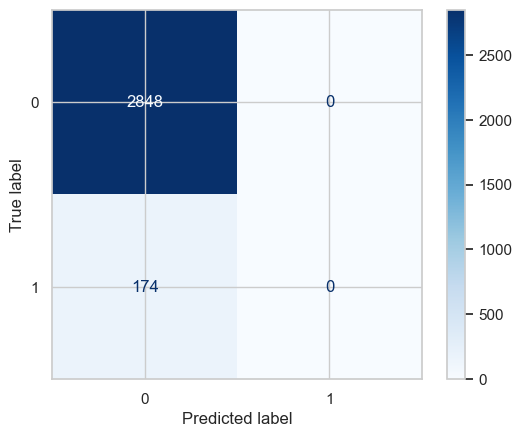

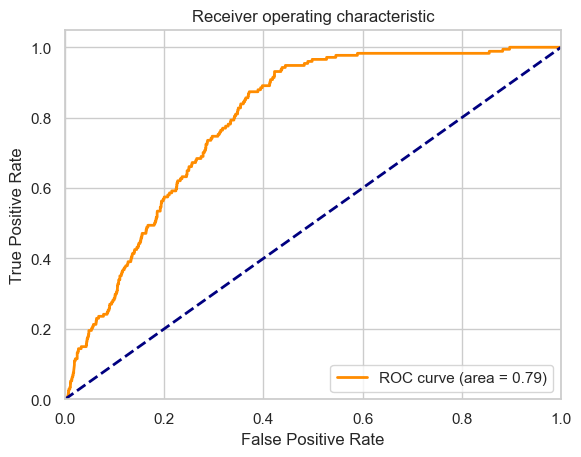

In [66]:
import statsmodels.api as sm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Add a constant term to the independent variable matrix to allow statsmodels to calculate the intercept
X_Train = sm.add_constant(X_Train)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(Y_Train, X_Train)
result = logit_model.fit()

# Make predictions on the testing set
X_Test = sm.add_constant(X_Test)
y_pred = result.predict(X_Test)

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy and other metrics
train_acc = accuracy_score(Y_Train, (result.predict(X_Train) > 0.5).astype(int))
test_acc = accuracy_score(Y_Test, y_pred_binary)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred_binary)

print(f"Training accuracy of Logistic Regression is : {train_acc}")
print(f"Test accuracy of Logistic Regression is : {test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")

print(classification_report(Y_Test, y_pred_binary))

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# compute binary predictions
y_pred_binary = (y_pred >= 0.5).astype(int)

# create confusion matrix
cm = confusion_matrix(Y_Test, y_pred_binary)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues, values_format='.5g')

plt.show()
from sklearn.metrics import roc_curve, auc
# Compute the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(Y_Test, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()




# On Balanced data set 

In [67]:
import statsmodels.api as sm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Add a constant term to the independent variable matrix to allow statsmodels to calculate the intercept
X_Train_1 = sm.add_constant(X_Train_1)

# Fit the logistic regression model using statsmodels
logit_model = sm.Logit(Y_Train_1, X_Train_1)
result = logit_model.fit()

# Make predictions on the testing set
X_Test_1 = sm.add_constant(X_Test_1)
y_pred = result.predict(X_Test_1)

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate accuracy and other metrics
train_acc = accuracy_score(Y_Train_1, (result.predict(X_Train_1) > 0.5).astype(int))
test_acc = accuracy_score(Y_Test_1, y_pred_binary)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred_binary)

print(f"Training accuracy of Logistic Regression is : {train_acc}")
print(f"Test accuracy of Logistic Regression is : {test_acc}")
print(f"Logistic Regression cohen_kappa_score : {cohen_kappa}")

print(classification_report(Y_Test_1, y_pred_binary))


Optimization terminated successfully.
         Current function value: 0.512402
         Iterations 7
Training accuracy of Logistic Regression is : 0.7475356451328992
Test accuracy of Logistic Regression is : 0.7414642731432595
Logistic Regression cohen_kappa_score : 0.4839676079219708
              precision    recall  f1-score   support

           0       0.87      0.57      0.69      2858
           1       0.68      0.91      0.78      2824

    accuracy                           0.74      5682
   macro avg       0.77      0.74      0.73      5682
weighted avg       0.77      0.74      0.73      5682



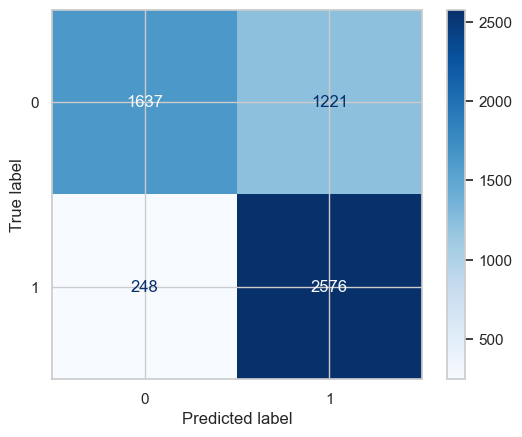

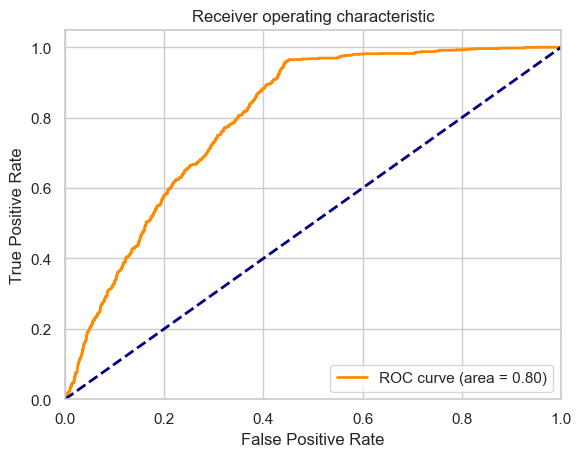

In [68]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# compute binary predictions
y_pred_binary = (y_pred >= 0.5).astype(int)

# create confusion matrix
cm = confusion_matrix(Y_Test_1, y_pred_binary)

# plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['0', '1'])
disp.plot(cmap=plt.cm.Blues, values_format='.5g')

plt.show()
from sklearn.metrics import roc_curve, auc
# Compute the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Model :-3
# RandomForest Classifier Using Sk learn Library

### a. On Im Balanced data set 

In [69]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_Train, Y_Train)

y_pred = rand_clf.predict(X_Test)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_22132\1903044746.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_clf.fit(X_Train, Y_Train)


C:\Users\Aniket\AppData\Local\Temp\ipykernel_22132\3811394026.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_rfc.fit(X_Train, Y_Train)


Training accuracy of Random Forest is : 0.9435710739698825
Test accuracy of Random Forest is : 0.942753143613501
RF cohen_kappa_score : 0.030400706234073427
[[2846    2]
 [ 171    3]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2848
           1       0.60      0.02      0.03       174

    accuracy                           0.94      3022
   macro avg       0.77      0.51      0.50      3022
weighted avg       0.92      0.94      0.92      3022



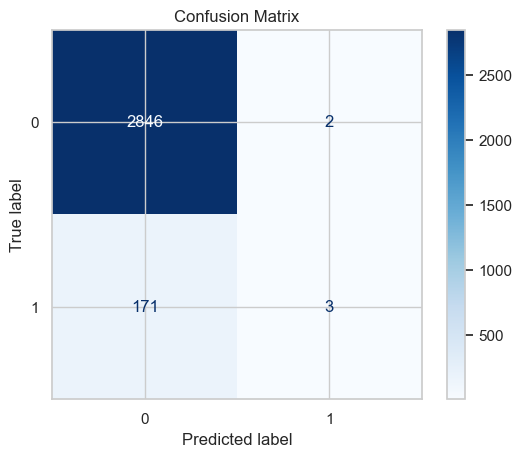

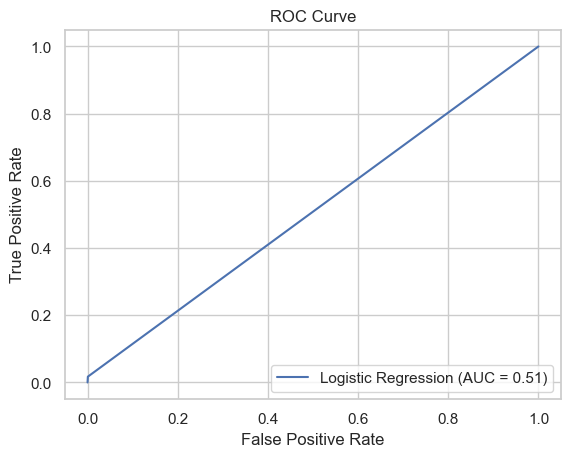

In [70]:



# Define the model
best_rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Train the model
best_rfc.fit(X_Train, Y_Train)

# Make predictions on the testing set
y_pred = best_rfc.predict(X_Test)

# Calculate accuracy and other metrics
rand_clf_train_acc = accuracy_score(Y_Train, best_rfc.predict(X_Train))
rand_clf_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(f"RF cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test, y_pred))

print(classification_report(Y_Test, y_pred))

# Plot confusion matrix
cm = confusion_matrix(Y_Test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rfc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_Test, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test, y_pred)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot()
plt.title("ROC Curve")
plt.show()


### b. on Balanced data

In [71]:
from sklearn.ensemble import RandomForestClassifier

rand_clf = RandomForestClassifier()
rand_clf.fit(X_Train_1, Y_Train_1)

y_pred_1= rand_clf.predict(X_Test_1)

C:\Users\Aniket\AppData\Local\Temp\ipykernel_22132\3352499936.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_clf.fit(X_Train_1, Y_Train_1)


Training accuracy of Random Forest is : 0.9745643372645661
Test accuracy of Random Forest is : 0.9596972896867301
RF cohen_kappa_score : 0.9194285198387404
[[2635  223]
 [   6 2818]]
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      2858
           1       0.93      1.00      0.96      2824

    accuracy                           0.96      5682
   macro avg       0.96      0.96      0.96      5682
weighted avg       0.96      0.96      0.96      5682



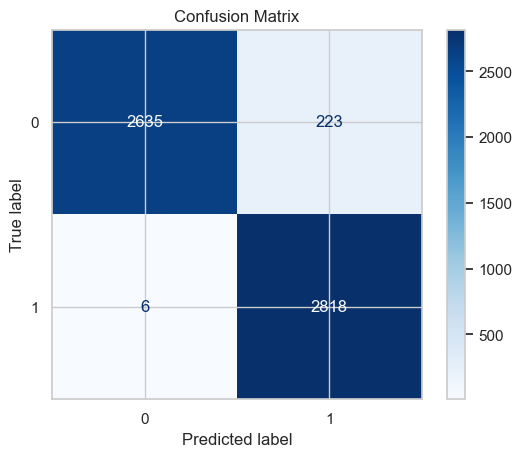

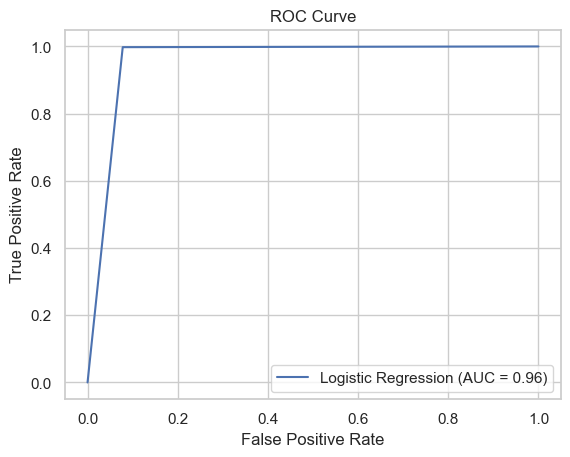

In [72]:

rand_clf_train_acc = accuracy_score(Y_Train_1, rand_clf.predict(X_Train_1))
rand_clf_test_acc = accuracy_score(Y_Test_1, y_pred_1)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred_1)

print(f"Training accuracy of Random Forest is : {rand_clf_train_acc}")
print(f"Test accuracy of Random Forest is : {rand_clf_test_acc}")
print(f"RF cohen_kappa_score : {cohen_kappa}")

print(confusion_matrix(Y_Test_1, y_pred_1))

print(classification_report(Y_Test_1, y_pred_1))
# Plot confusion matrix
cm = confusion_matrix(Y_Test_1, y_pred_1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rfc.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred_1, pos_label=1)
roc_auc = roc_auc_score(Y_Test_1, y_pred_1)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot()
plt.title("ROC Curve")
plt.show()


## As Random Forest is performing well checking the importance of the feature

In [73]:
importances = rand_clf.feature_importances_

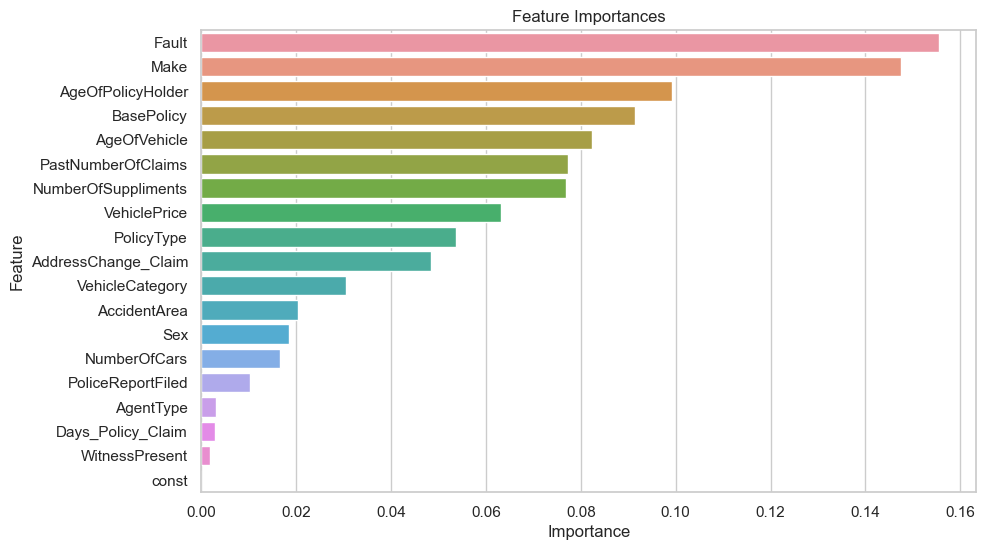

In [74]:
feature_importances = pd.DataFrame({'feature': X_Train_1.columns, 'importance': importances})
feature_importances = feature_importances.sort_values(by='importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Model -4   random Forest with H20 Library 

###  a. on Im balanced data set 

In [75]:
!pip install h2o

In [76]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

h2o.init()
train_df = h2o.H2OFrame(pd.concat([X_Train, Y_Train], axis=1))
test_df = h2o.H2OFrame(pd.concat([X_Test, Y_Test], axis=1))

train_df['FraudFound_P']=train_df['FraudFound_P'].asfactor()
feature=train_df.columns
feature.remove('FraudFound_P')
target='FraudFound_P'
rfc = H2ORandomForestEstimator()
rfc.train(x=feature,y=target,training_frame=train_df)
y_pred = rfc.predict(test_df)

y_pred = rfc.predict(test_df)
y_pred_1 = y_pred['predict'].as_data_frame().values.flatten()



Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,9 hours 42 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_Aniket_mfgj37
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,49.44 Mb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C:\Users\Aniket\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [const]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [77]:
rfc_train_acc = rfc.model_performance(train_df).accuracy()[0][1]
rfc_test_acc = rfc.model_performance(test_df).accuracy()[0][1]
cohen_kappa = cohen_kappa_score(Y_Test, y_pred_1)
print(f"Training accuracy of Random Forest is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest is : {rfc_test_acc}")


Training accuracy of Random Forest is : 0.9789012080092669
Test accuracy of Random Forest is : 0.9417604235605559


In [78]:
# Convert H2OFrame to pandas DataFrame
y_true = test_df['FraudFound_P'].as_data_frame().values.flatten()

# Convert H2OFrame to pandas DataFrame
y_pred = rfc.predict(test_df)['predict'].as_data_frame().values.flatten()

# Compute and print confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion matrix:\n', cm)

# Compute and print classification report
cr = classification_report(y_true, y_pred)
print('Classification report:\n', cr)

# Compute and print Cohen's kappa score
kappa = cohen_kappa_score(y_true, y_pred)
print('Cohen\'s kappa score:', kappa)


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion matrix:
 [[2445  403]
 [  98   76]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      0.86      0.91      2848
           1       0.16      0.44      0.23       174

    accuracy                           0.83      3022
   macro avg       0.56      0.65      0.57      3022
weighted avg       0.92      0.83      0.87      3022

Cohen's kappa score: 0.1619838443460193


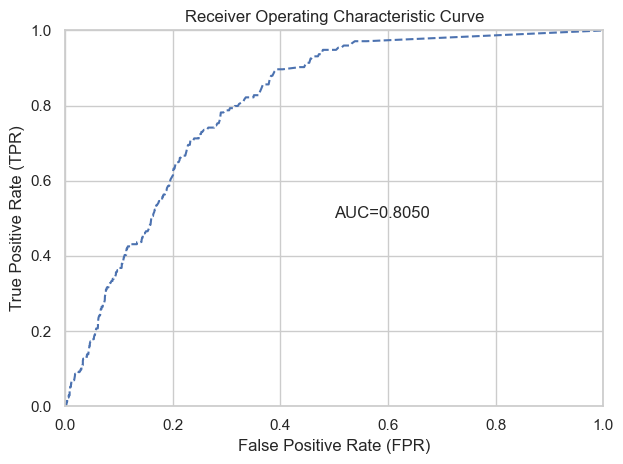

([0.0007022471910112359, 0.001053370786516854, 0.0014044943820224719, 0.0017556179775280898, 0.0017556179775280898, 0.002106741573033708, 0.0024578651685393258, 0.0028089887640449437, 0.0031601123595505617, 0.0035112359550561797, 0.0038623595505617976, 0.0038623595505617976, 0.004213483146067416, 0.004564606741573034, 0.004564606741573034, 0.0049157303370786515, 0.0052668539325842695, 0.0056179775280898875, 0.0059691011235955055, 0.006320224719101123, 0.006671348314606741, 0.006671348314606741, 0.007022471910112359, 0.007373595505617977, 0.008075842696629214, 0.008426966292134831, 0.008426966292134831, 0.008426966292134831, 0.008426966292134831, 0.00877808988764045, 0.009129213483146067, 0.009480337078651686, 0.009831460674157303, 0.010533707865168539, 0.010884831460674158, 0.010884831460674158, 0.011235955056179775, 0.011587078651685394, 0.01228932584269663, 0.012640449438202247, 0.013342696629213483, 0.013693820224719102, 0.014044943820224719, 0.014396067415730338, 0.0147471910112359

In [79]:
print(rfc.model_performance(test_data=test_df).plot())



### b. On balanced data set  Applying H20

1. X_1= df_upsampled.drop('FraudFound_P',axis=1)
2. Y_1= df_upsampled[['FraudFound_P']]
3. X_Train_1, X_Test_1, Y_Train_1, Y_Test_1 = train_test_split(X_1,Y_1,test_size = 0.2,  random_state=42)
4. X_Train_1.shape, X_Test_1.shape, Y_Train_1.shape, Y_Test_1.shape

In [80]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score

h2o.init()
train_df = h2o.H2OFrame(pd.concat([X_Train_1, Y_Train_1], axis=1))
test_df = h2o.H2OFrame(pd.concat([X_Test_1, Y_Test_1], axis=1))

train_df['FraudFound_P']=train_df['FraudFound_P'].asfactor()
feature=train_df.columns
feature.remove('FraudFound_P')
target='FraudFound_P'
rfc = H2ORandomForestEstimator()
rfc.train(x=feature,y=target,training_frame=train_df)
y_pred = rfc.predict(test_df)

y_pred = rfc.predict(test_df)
y_pred_1 = y_pred['predict'].as_data_frame().values.flatten()

X_1= df_upsampled.drop('FraudFound_P',axis=1)
Y_1= df_upsampled[['FraudFound_P']]
X_Train_1, X_Test_1, Y_Train_1, Y_Test_1 = train_test_split(X_1,Y_1,test_size = 0.2,  random_state=42)
X_Train_1.shape, X_Test_1.shape, Y_Train_1.shape, Y_Test_1.shape

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,9 hours 44 mins
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,1 month
H2O_cluster_name:,H2O_from_python_Aniket_mfgj37
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,158.2 Mb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


C:\Users\Aniket\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:193: RuntimeWarning: Dropping bad and constant columns: [const]
  warnings.warn(mesg["message"], RuntimeWarning)


drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


((22724, 18), (5682, 18), (22724, 1), (5682, 1))

In [81]:
rfc_train_acc = rfc.model_performance(train_df).accuracy()[0][1]
rfc_test_acc = rfc.model_performance(test_df).accuracy()[0][1]
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred_1)
print(f"Training accuracy of Random Forest is : {rfc_train_acc}")
print(f"Test accuracy of Random Forest is : {rfc_test_acc}")

Training accuracy of Random Forest is : 0.9690635451505016
Test accuracy of Random Forest is : 0.9537134811686026


In [82]:
# Convert H2OFrame to pandas DataFrame
y_true = test_df['FraudFound_P'].as_data_frame().values.flatten()

# Convert H2OFrame to pandas DataFrame
y_pred = rfc.predict(test_df)['predict'].as_data_frame().values.flatten()

# Compute and print confusion matrix
cm = confusion_matrix(y_true, y_pred)
print('Confusion matrix:\n', cm)

# Compute and print classification report
cr = classification_report(y_true, y_pred)
print('Classification report:\n', cr)

# Compute and print Cohen's kappa score
kappa = cohen_kappa_score(y_true, y_pred)
print('Cohen\'s kappa score:', kappa)


drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%
Confusion matrix:
 [[2654  204]
 [  75 2749]]
Classification report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      2858
           1       0.93      0.97      0.95      2824

    accuracy                           0.95      5682
   macro avg       0.95      0.95      0.95      5682
weighted avg       0.95      0.95      0.95      5682

Cohen's kappa score: 0.9018183034329078


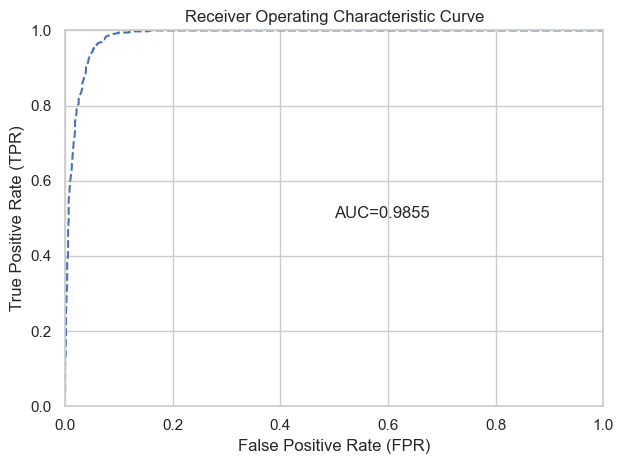

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0003498950314905528, 0.0003498950314905528, 0.0010496850944716584, 0.0010496850944716584, 0.0010496850944716584, 0.0013995801259622112, 0.0017494751574527643, 0.0017494751574527643, 0.0017494751574527643, 0.0017494751574527643, 0.0017494751574527643, 0.0017494751574527643, 0.0017494751574527643, 0.0017494751574527643, 0.0017494751574527643, 0.002099370188943317, 0.002099370188943317, 0.00244926522043387, 0.00244926522043387, 0.0027991602519244225, 0.0027991602519244225, 0.0031490552834149755, 0.0034989503149055285, 0.003848845346396081, 0.003848845346396081, 0.003848845346396081, 0.003848845346396081, 0.003848845346396081, 0.003848845346396081, 0.003848845346396081, 0.003848845346396081, 0.003848845346396081, 0.003848845346396081, 0.003848845346396081, 0.003848845346396081, 0.004548635409377187, 0.005248425472358292, 0.005598320503848845, 0.005598320503848845, 0.005598320503848845, 0.005598320503848845, 0.005598320503848845, 0.005598320503848

In [83]:
print(rfc.model_performance(test_data=test_df).plot())


#  Model :- 5

### a. Using XG boost on imbalnced data set 

In [84]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define XGBClassifier model
xgb = XGBClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Define GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5)

# Fit GridSearchCV on training data
grid_search.fit(X_Train, Y_Train)
# Print best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 50, 'reg_alpha': 0.5, 'reg_lambda': 2}


In [85]:
# Get best estimator and predict on test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_Test)

# Compute train and test accuracy and Cohen's kappa score
xgb_train_acc = accuracy_score(Y_Train, best_xgb.predict(X_Train))
xgb_test_acc = accuracy_score(Y_Test, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test, y_pred)

# Print results
print(f"Training accuracy of tuned XGBoost is: {xgb_train_acc}")
print(f"Test accuracy of tuned XGBoost is: {xgb_test_acc}")
print(f"Tuned XGBoost Cohen's kappa score: {cohen_kappa}")

# Print confusion matrix and classification report
print(confusion_matrix(Y_Test, y_pred))
print(classification_report(Y_Test, y_pred))

Training accuracy of tuned XGBoost is: 0.9423299685586629
Test accuracy of tuned XGBoost is: 0.9440767703507611
Tuned XGBoost Cohen's kappa score: 0.08018845836590183
[[2845    3]
 [ 166    8]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2848
           1       0.73      0.05      0.09       174

    accuracy                           0.94      3022
   macro avg       0.84      0.52      0.53      3022
weighted avg       0.93      0.94      0.92      3022



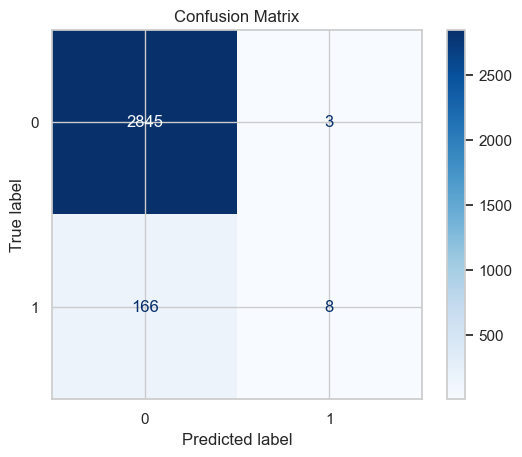

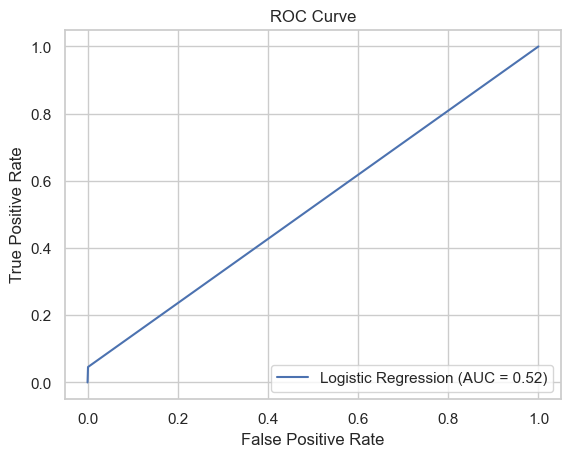

In [86]:

# Plot confusion matrix
cm = confusion_matrix(Y_Test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_Test, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test, y_pred)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot()
plt.title("ROC Curve")
plt.show()


### b. on balanced data set (X_Test_1, Y_Test_1)

In [87]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define XGBClassifier model
xgb = XGBClassifier()

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [1, 1.5, 2]
}

# Define GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(xgb, param_grid, cv=5)

# Fit GridSearchCV on training data
grid_search.fit(X_Train_1, Y_Train_1)
# Print best parameters
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0.5, 'reg_lambda': 1}


In [88]:
# Get best estimator and predict on test data
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_Test_1)

# Compute train and test accuracy and Cohen's kappa score
xgb_train_acc = accuracy_score(Y_Train_1, best_xgb.predict(X_Train_1))
xgb_test_acc = accuracy_score(Y_Test_1, y_pred)
cohen_kappa = cohen_kappa_score(Y_Test_1, y_pred)

# Print results
print(f"Training accuracy of tuned XGBoost is: {xgb_train_acc}")
print(f"Test accuracy of tuned XGBoost is: {xgb_test_acc}")
print(f"Tuned XGBoost Cohen's kappa score: {cohen_kappa}")

# Print confusion matrix and classification report
print(confusion_matrix(Y_Test_1, y_pred))
print(classification_report(Y_Test_1, y_pred))

Training accuracy of tuned XGBoost is: 0.8876078155254357
Test accuracy of tuned XGBoost is: 0.8678282294966561
Tuned XGBoost Cohen's kappa score: 0.735958994763833
[[2202  656]
 [  95 2729]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2858
           1       0.81      0.97      0.88      2824

    accuracy                           0.87      5682
   macro avg       0.88      0.87      0.87      5682
weighted avg       0.88      0.87      0.87      5682



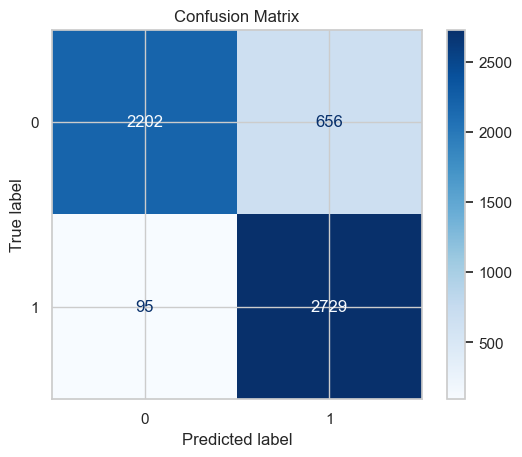

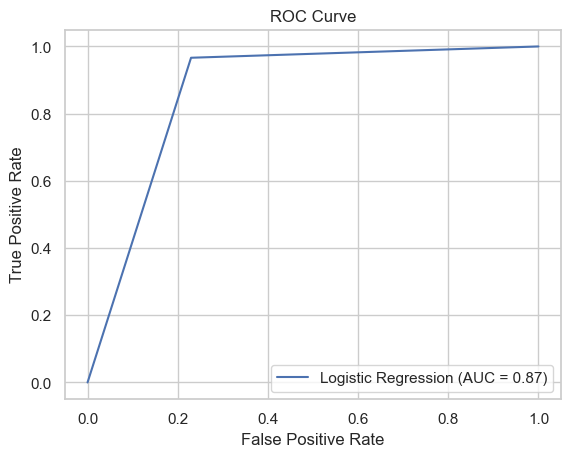

In [89]:

# Plot confusion matrix
cm = confusion_matrix(Y_Test_1, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xgb.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(Y_Test_1, y_pred, pos_label=1)
roc_auc = roc_auc_score(Y_Test_1, y_pred)

disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
disp.plot()
plt.title("ROC Curve")
plt.show()

# Summary 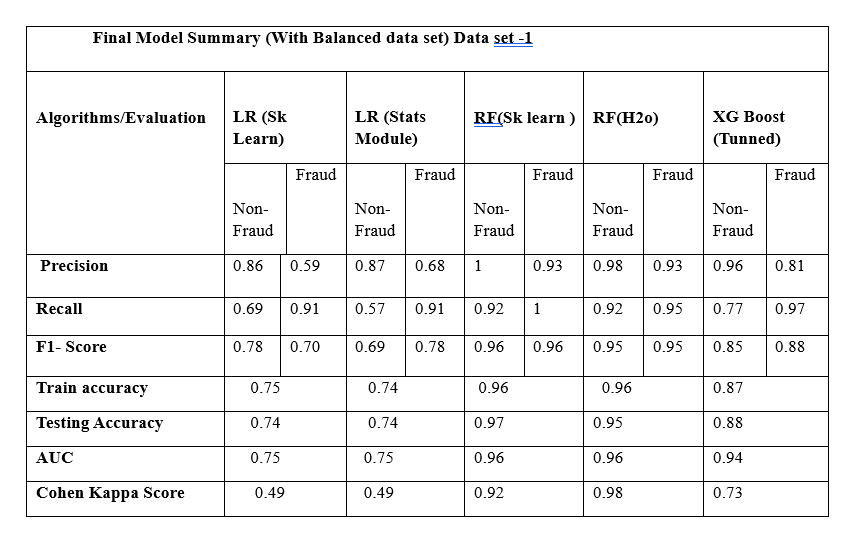

# END OF THE CODE 